# Lecture 13

0. No more solving diferential equations!!!
1. White board stuff
2. pandas, not the cute kind
3. chi^2 fitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pandas is the moduel to work with sets of data. These are normally called data frams in pandas

In [2]:
x = [1,2,3,4,5,6,7]
y = [2,5,2,7,9,2,6]

In [3]:
# Making data frames works best with dictionaries
data = {"x": x, "y":y}
df = pd.DataFrame(data)

In [4]:
df

,x,y
0,1,2
1,2,5
2,3,2
3,4,7
4,5,9
5,6,2
6,7,6


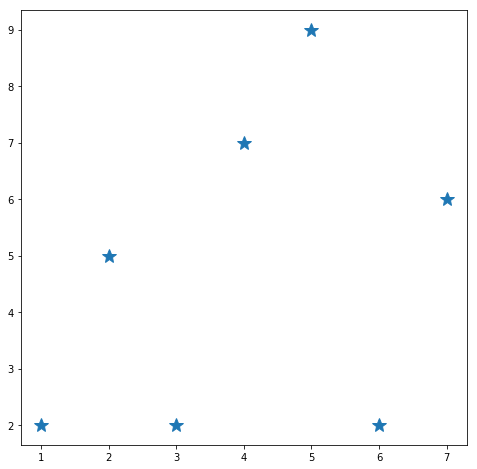

In [5]:
# I can Plot the data
plt.figure(figsize = (8,8))
plt.plot(df['x'], df['y'], '*', markersize = 14)

Most common way to save this data is as a .csv file. (Think excel)

In [6]:
df.to_csv("foo_data.csv")

In [7]:
# Read in a csv file
temp = pd.read_csv("temp.csv")

In [8]:
temp

,Unnamed: 0,x,T,dT
0,1,1,15.6,4.5
1,2,2,17.5,4.5
2,3,3,36.6,4.5
3,4,4,43.8,4.5
4,5,5,58.2,4.5
5,6,6,61.6,4.5
6,7,7,64.2,4.5
7,8,8,70.4,4.5
8,9,9,98.8,4.5


The extra Unnamed column is from jumping between the pandas dataframe and the normal csv file, we can get rid of this just by adding,

In [9]:
temp = temp[["x", "T", "dT"]]

In [10]:
temp

,x,T,dT
0,1,15.6,4.5
1,2,17.5,4.5
2,3,36.6,4.5
3,4,43.8,4.5
4,5,58.2,4.5
5,6,61.6,4.5
6,7,64.2,4.5
7,8,70.4,4.5
8,9,98.8,4.5


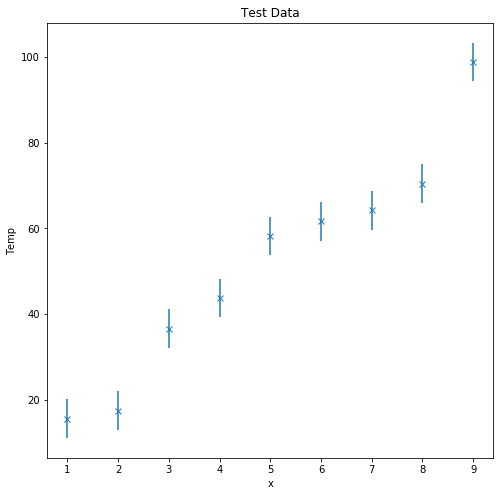

In [11]:
plt.figure(figsize = (8,8))
plt.errorbar(temp['x'], temp['T'], yerr = temp['dT'], fmt = 'x')
plt.title("Test Data")
plt.xlabel('x')
plt.ylabel('Temp')
plt.show()

In [12]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 7/linfit.py'
def linfit(x, y, sigma_y):
    """
    This function will make a least-squares fit to some data with a straight line
    f(x) = a + b*x

    Inputs
    ----------
    x:          Independent variable

    y:          Dependent variable

    sigma_y:    Array of uncertainties in the dependent variable

    Output
    ----------
    fitpar: Array of fit parameters
            fitpar[0]: y intercept (a)
            fitpar[1]: uncertainty in y intercept
            fitpar[2]: slope (b)
            fitpar[3]: uncertainty in slope
            fitpar[4]: reduced chi-squared
    """
    npar = 2            # Number of fitting parameters.
    npts = len(x)       # Number of data points

    if npts < npar:
        print("Not enough data points to fit a first order polynomial")
        return

    if npts != len(y) or npts != len(sigma_y):
        print("Lengths of the inputs must be the same. len(x) = {}, len(y) = {},"
              "len(sigma_y) = {}".format(len(x),len(y), len(sigma_y)))
        return

    # Make sure everything is a np.array that'll make the math easier
    x = np.array(x)
    y = np.array(y)
    sigma_y = np.array(sigma_y)

    sw = sum(1 / sigma_y**2)
    sy = sum(y / sigma_y**2)
    sx = sum(x / sigma_y**2)
    sx2= sum(x**2 / sigma_y**2)
    sxy= sum(y*x / sigma_y**2)

    #Find the fit parameters
    Delta = sw*sx2 - sx*sx
    a = (sx2*sy - sx*sxy) / Delta
    b = (sxy*sw - sx*sy) / Delta
    da = np.sqrt(sx2 / Delta)
    db = np.sqrt(sw / Delta)

    fit = a + b*x
    chi2 = sum(( (y - fit) / sigma_y)**2)
    if npts > npar:
        chi2red = chi2 / (npts - npar)
    else:
        chi2red = 0

    return [a, da, b, db, chi2red]


In [15]:
def plotfit():
    data = pd.read_csv("/home/cody/Physics 331/Lecture Notebooks/temp.csv")
    x = data['x'].values
    T = data['T'].values
    dT = data['dT'].values
    if len(x) != len(T) or len(x) != len(dT):
        return print("Arrays must be the same length")
    fitpar = linfit(x, T, dT)
    xfit = np.array([x[0], x[-1]])
    yfit = fitpar[0] + fitpar[2]*xfit
    
    plt.figure(figsize = (10,8))
    plt.errorbar(x, T, yerr = dT, fmt = '.', label = "Data")
    plt.plot(xfit, yfit, label = "a = {}, b = {}, $\chi^2$ = {}".format(fitpar[0], fitpar[2], fitpar[4]))
    plt.legend(loc = 2)

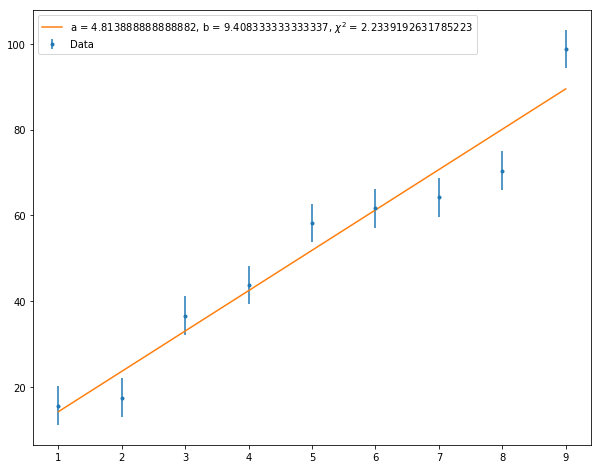

In [16]:
plotfit()

# Monte Carlo Stuff

In [20]:
darts = 4000000
x = np.random.uniform(-1,1,darts)
y = np.random.uniform(-1,1,darts)
hit = 0
for n in range(len(x)):
    if np.sqrt(x[n]**2 + y[n]**2) < 1:
        hit += 1
4*hit/darts

3.141329